# Install Requirements

To install the requirements for the project, use the following command :

`pip install -r requirements.txt`

Then install `ipykernel`

`python -m ipykernel install --user`

# I. Initialization

Import the main libraries for data visualization and machine learning

In [186]:
import pandas as pd # data processing, CSV file I/O
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # also data visualization

# Importing the different libraries for the machine learning models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Importing the different libraries for the training and evaluation of the machine learning models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# II. Importing the data and preliminary analysis

In [187]:
# First we will extract the data from the provided csv file
data = pd.read_csv('dataset/G2_Wine_Dataset.csv')

# Then we will display the first 5 rows of the data along with the dataset shape for reference
print(data.shape)
data.head()

(1290, 17)


,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,£9.99 per bottle,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,NV,NaN
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,£15.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,£12.49 per bottle,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,NaN
3,Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,£17.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,£15.99 per bottle,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021,Napa Valley


In [188]:
# Checking for missing values
data.isnull().sum()

Title                          0
Description                    4
Price                          0
Capacity                       0
Grape                         15
Secondary Grape Varieties    802
Closure                       11
Country                        6
Unit                           9
Characteristics               37
Per bottle / case / each       0
Type                           5
ABV                            9
Region                       166
Style                         78
Vintage                        7
Appellation                  646
dtype: int64

First we can observe that many of the columns have to be transformed to numerical values for Machine Learning computations :
- All of the prices are indicated in pounds and suffixed with the selling type, which is also a duplicate of the `Per bottle / case / each` column, we can then safely extract the value from this character string, furthermore we can remove the rows where the prices are not indicated per bottle to get consistent prices.
- The ABV column (Alcohol By Volume) is expressed in percentages and prefixed with "ABV", we can also extract the numerical value.
- The `Vintage` column has many rows containing "NV" (which would be no vintage), we could coerce those to zero.

In a second time, we can observe the `Title` and `description` columns aren't very meaningful for our purposes, and the `Unit` column doesn't provide any meaningful metric, so we can remove them from the dataset.

Finally, the other columns (such as `Grape`, `Closure`, `Country`, `Characteristics`, `Type`, `Region`, `Style` and `Appellation`) are categorical string values, which will need to be transformed and indexed to numerical values for machine learning computations.

There are also rows containing `null` values through many columns, such as `Appellation` and `Secondary Grape Varieties`, we also need to remove those.

In [189]:
# Removing the columns that are not needed
data.drop(columns=['Title', 'Description', 'Unit', 'Appellation', 'Secondary Grape Varieties'], axis=1, inplace=True) # inplace=True will modify the original dataframe without reassigning the variable

# Processing columns to numerical values
data['Price'] = data['Price'].str.extract(r'(\d+.\d+)').astype(float) # Here (\d+.\d+) is a regular expression that extracts the numerical value from the given string
data['ABV'] = data['ABV'].str.extract(r'(\d+.\d+)').astype(float)
data['Vintage'] = data['Vintage'].replace('NV', 0) # We also need to coerce the 'NV' values to 0
data['Vintage'] = data['Vintage'].str.extract(r'(\d+)').dropna().astype(int)

# Filter the rows to only include wine selled per bottle and then drop the column
data = data[data['Per bottle / case / each'] == 'per bottle']
data.drop(columns=['Per bottle / case / each'], inplace=True)

# Drop the rows with missing values
data.dropna(inplace=True)

In [190]:
print(data.shape)

(1012, 11)


# IV. Exploratory Data Analysis (EDA)

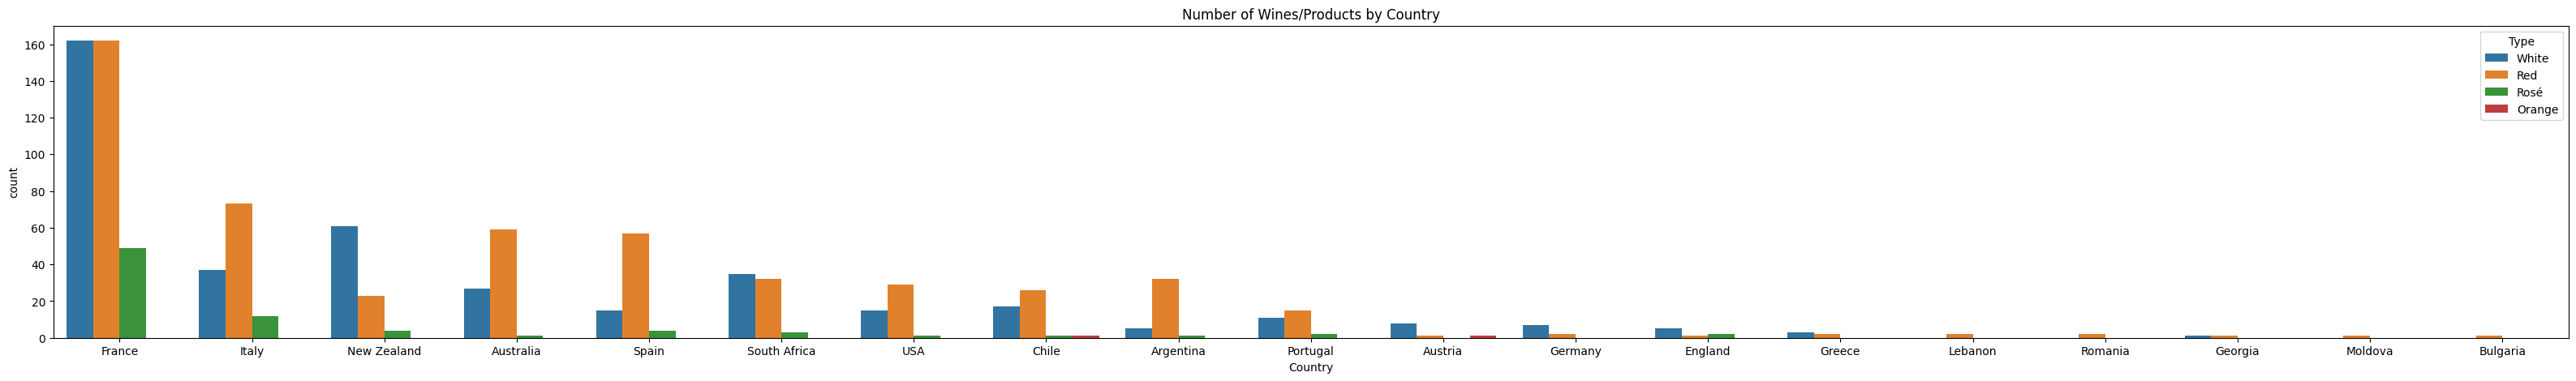

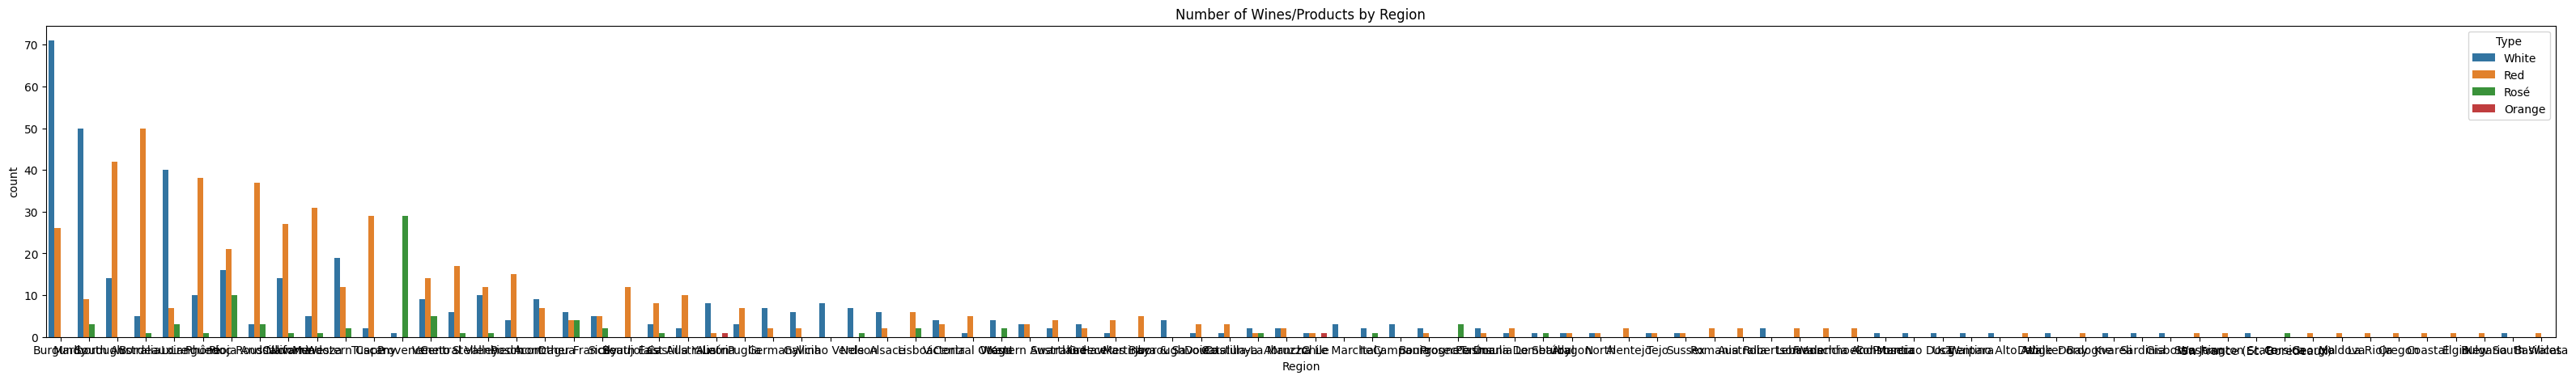

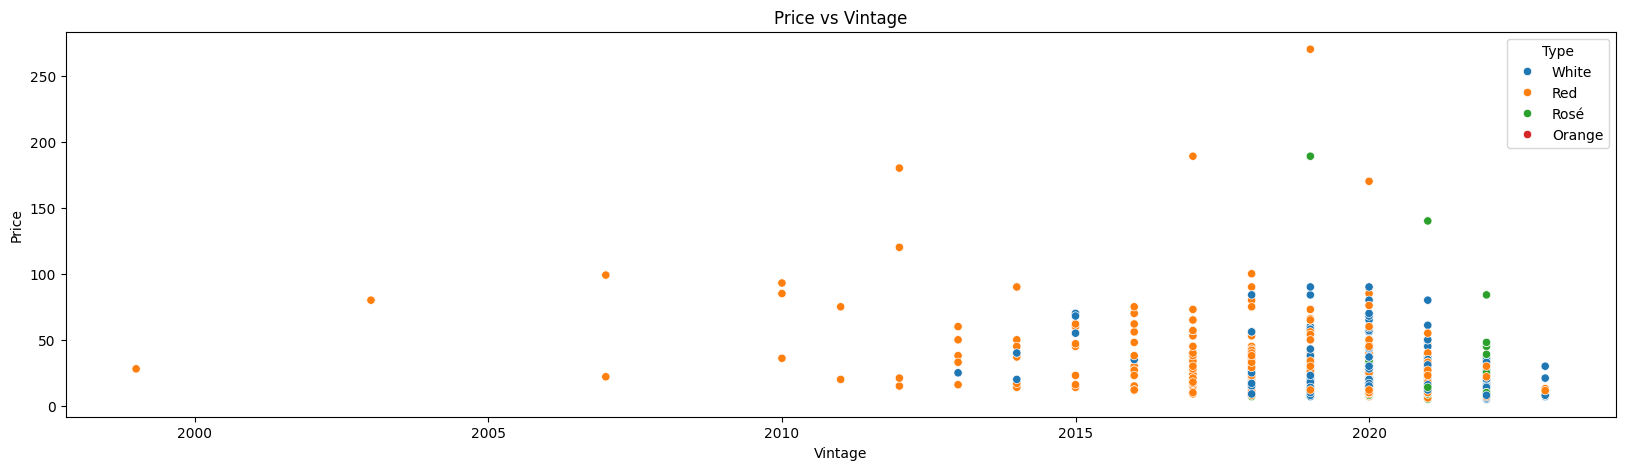

In [191]:
# Display a scatter plot of the data between all the columns

df = data.copy()

# graph of the number of products per country where each bar displays the repartition of the types of wines
plt.figure(figsize=(40,5))
sns.countplot(x='Country', data=data, hue='Type', order=data['Country'].value_counts().index)
plt.title("Number of Wines/Products by Country")
plt.show()

# graph of the number of products per country where each bar displays the repartition of the types of wines
plt.figure(figsize=(40,5))
sns.countplot(x='Region', data=data, hue='Type', order=data['Region'].value_counts().index)
plt.title("Number of Wines/Products by Region")
plt.show()

# A scatter plot between Price and Vintage
plt.figure(figsize=(20,5))
sns.scatterplot(x='Vintage', y='Price', data=df, hue='Type')
plt.title("Price vs Vintage")
plt.show()




We can observe that the majority of the wines are from France,
We can also observe red wines are generally more expansive than other types of wines.

Also, older wines gets more expansive as they get older, and are exclusively red wines, but this is not representative since the data of each type of wine doesn't have the same amount of samples, so the margin of error is quite high.

# V. Make a Machine Learning model

We will make a machine learning model focused on the types of wines

In [192]:


# We have to tranform the columns with categorical values into numerical values

df['Country'] = df['Country'].astype('category').cat.codes
df['Grape'] = df['Grape'].astype('category').cat.codes
df['Closure'] = df['Closure'].astype('category').cat.codes
df['Type'] = df['Type'].astype('category').cat.codes
df['Region'] = df['Region'].astype('category').cat.codes

# Split the wine characteristics and style into serarate columns
df['Characteristics'] = df['Characteristics'].str.split(', ')
characteristics_expanded = df['Characteristics'].apply(lambda x: pd.Series([1] * len(x), index=x)) # Create a dataframe with the characteristics values
characteristics_expanded = characteristics_expanded.rename(columns = lambda x : 'characteristics_' + str(x))
df = pd.concat([df, characteristics_expanded], axis=1)
df.drop(columns=['Characteristics'], inplace=True)

df['Style'] = df['Style'].str.split(' & ')
style_expanded = df['Style'].apply(lambda x: pd.Series([1] * len(x), index=x)) # Create a dataframe with the style values
style_expanded = style_expanded.rename(columns = lambda x : 'style_' + str(x))
df = pd.concat([df, style_expanded], axis=1)
df.drop(columns=['Style'], inplace=True)

# Fill null values with 0
df.fillna(0, inplace=True)

print(df.isnull().sum())

# Transform the capacity column into numerical values and convert the unit to ml

# we first have to check if the string contains the substring 'ML', 'CL' or 'LTR' and then extract the numerical value and convert it to ml if needed
df['Capacity'] = df['Capacity'].str.replace(',', '')
df['Capacity'] = df['Capacity'].str.replace(' ', '')
df['Capacity'] = df['Capacity'].str.replace('LTR', '')
df['Capacity'] = df['Capacity'].str.replace('CL', '')
df['Capacity'] = df['Capacity'].str.replace('ML', '')
df['Capacity'] = df['Capacity'].str.extract(r'(\d+)').astype(float)
df['Capacity'] = np.where(df['Capacity'] < 100, df['Capacity']*10, df['Capacity'])
df['Capacity'] = np.where(df['Capacity'] > 1000, df['Capacity']/10, df['Capacity'])

print(df.shape)



Price            0
Capacity         0
Grape            0
Closure          0
Country          0
                ..
style_Floral     0
style_Light      0
style_Soft       0
style_Fruity     0
style_Elegant    0
Length: 135, dtype: int64
(1012, 135)


In [199]:
X, y = df.drop(columns=['Type']), data['Type'] # X is the input data and y is the output data

train_state = 42 # Random state for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=train_state) # Split the data into training and testing data

### Algorithme Random Forest

In [200]:
clf = RandomForestClassifier(n_estimators=100, random_state=train_state)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.9835526315789473


### Algorithme Decision Tree Classifier

In [201]:
clf = DecisionTreeClassifier(random_state=train_state)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9835526315789473


### Algorithme K-Neighbours Classifier

In [202]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7105263157894737


### Algorithme Support Vector Machine

In [203]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.5164473684210527


### Algorithme Naives Bayes Gaussien

In [204]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9901315789473685
